<a href="https://colab.research.google.com/github/Archita0304/SNA/blob/main/Project_SNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tweepy networkx matplotlib pandas nltk vaderSentiment tabulate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.8 MB/s eta 0:00:00


In [ ]:
!pip install python-louvain
!pip install node2vec
!pip install pyvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd

data = pd.read_csv("/content/snadata.csv")

print(data.head())


   id  Gender  Age           City Profession  Academic Pressure  \
0   2    Male   33  Visakhapatnam    Student                  5   
1   8  Female   24      Bangalore    Student                  2   
2  26    Male   31       Srinagar    Student                  3   
3  30  Female   28       Varanasi    Student                  3   
4  32  Female   25         Jaipur    Student                  4   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0              0  8.97                   2                 0   
1              0  5.90                   5                 0   
2              0  7.03                   5                 0   
3              0  5.59                   2                 0   
4              0  8.13                   3                 0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8 hours

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from node2vec import Node2Vec
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import plotly.graph_objects as go
from tabulate import tabulate
from pyvis.network import Network
from networkx.algorithms.community import greedy_modularity_communities


Heat Map based on sucidal thoughts and city


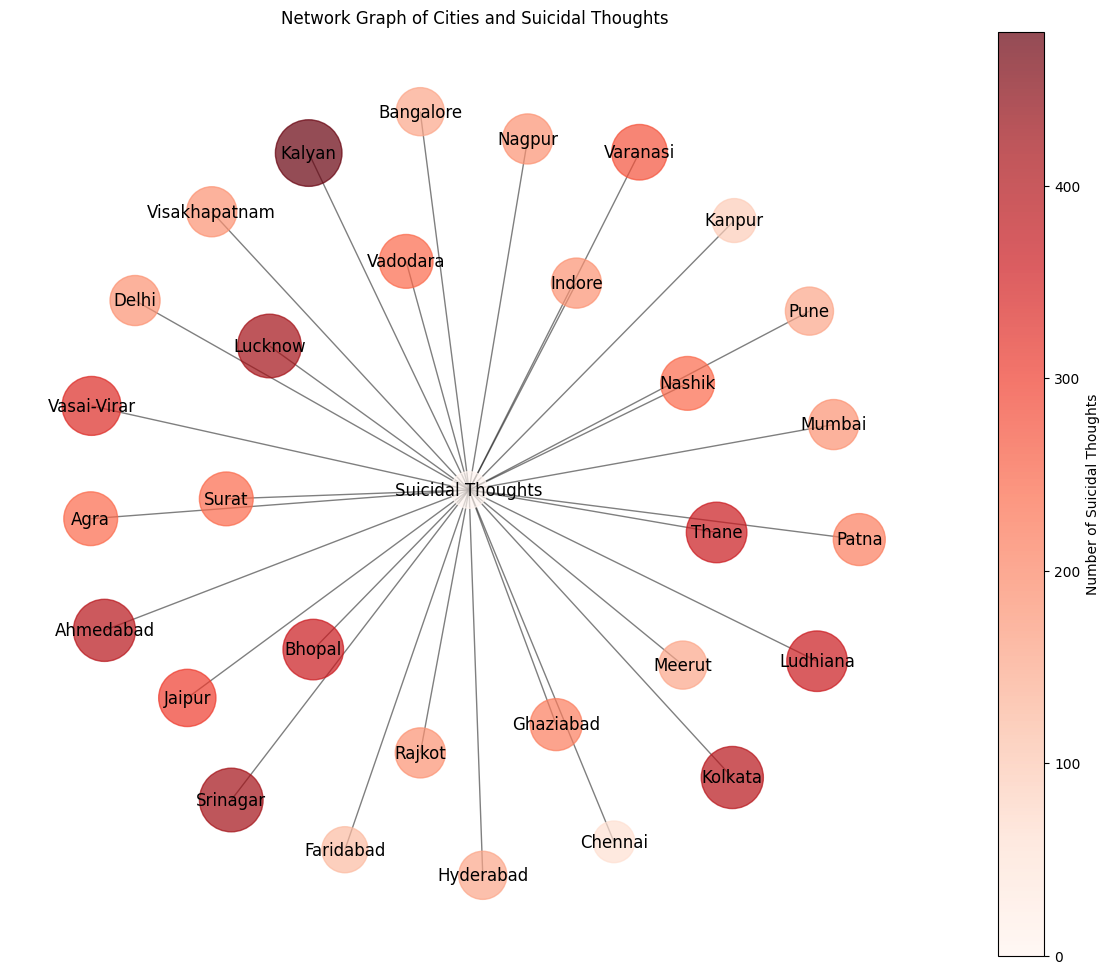

In [ ]:
G = nx.Graph()
city_suicidal_counts = data[data['Have you ever had suicidal thoughts ?'] == 'Yes']['City'].value_counts().to_dict()

# Add nodes and edges based on the conditions
for index, row in data.iterrows():
    city = row['City']
    if not G.has_node(city):
        count = city_suicidal_counts.get(city, 0)
        G.add_node(city, count=count)

    if row['Have you ever had suicidal thoughts ?'] == 'Yes':
        G.add_edge(city, 'Suicidal Thoughts')

node_colors = []
node_sizes = []
for node in G.nodes(data=True):
    count = node[1].get('count', 0)
    node_colors.append(count * 30)
    node_sizes.append(count * 100 + 700)


plt.figure(figsize=(15, 12))
pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap='Reds', alpha=0.7)
nx.draw_networkx_edges(G, pos,alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12)
plt.title('Network Graph of Cities and Suicidal Thoughts')


plt.colorbar(nodes, label='Number of Suicidal Thoughts')
plt.axis('off')
plt.show()

Centrality Measures

In [ ]:
degree = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
eigenvector = nx.eigenvector_centrality(G)
clustering = nx.clustering(G)

degree_df = pd.DataFrame(degree.items(), columns=['City', 'Degree Centrality'])
betweenness_df = pd.DataFrame(betweenness.items(), columns=['City', 'Betweenness Centrality'])
closeness_df = pd.DataFrame(closeness.items(), columns=['City', 'Closeness Centrality'])
eigenvector_df = pd.DataFrame(eigenvector.items(), columns=['City', 'Eigenvector Centrality'])
clustering_df = pd.DataFrame(clustering.items(), columns=['City', 'Clustering Coefficient'])

centrality_df = degree_df.merge(betweenness_df, on='City')
centrality_df = centrality_df.merge(closeness_df, on='City')
centrality_df = centrality_df.merge(eigenvector_df, on='City')
centrality_df = centrality_df.merge(clustering_df, on='City')

print("\033[3;3mCentrality Measures for Different Factors Related to Suicidal Thoughts:\033[0m")
print(tabulate(centrality_df, headers='keys', tablefmt='pretty', showindex=False))

Centrality Measures for Different Factors Related to Suicidal Thoughts:
+-------------------+---------------------+------------------------+----------------------+------------------------+------------------------+
|       City        |  Degree Centrality  | Betweenness Centrality | Closeness Centrality | Eigenvector Centrality | Clustering Coefficient |
+-------------------+---------------------+------------------------+----------------------+------------------------+------------------------+
|   Visakhapatnam   | 0.03333333333333333 |          0.0           |  0.5084745762711864  |  0.12909975937472642   |           0            |
| Suicidal Thoughts |         1.0         |          1.0           |         1.0          |   0.7071050585886317   |           0            |
|     Bangalore     | 0.03333333333333333 |          0.0           |  0.5084745762711864  |  0.12909975937472642   |           0            |
|     Srinagar      | 0.03333333333333333 |          0.0           |  0.5084

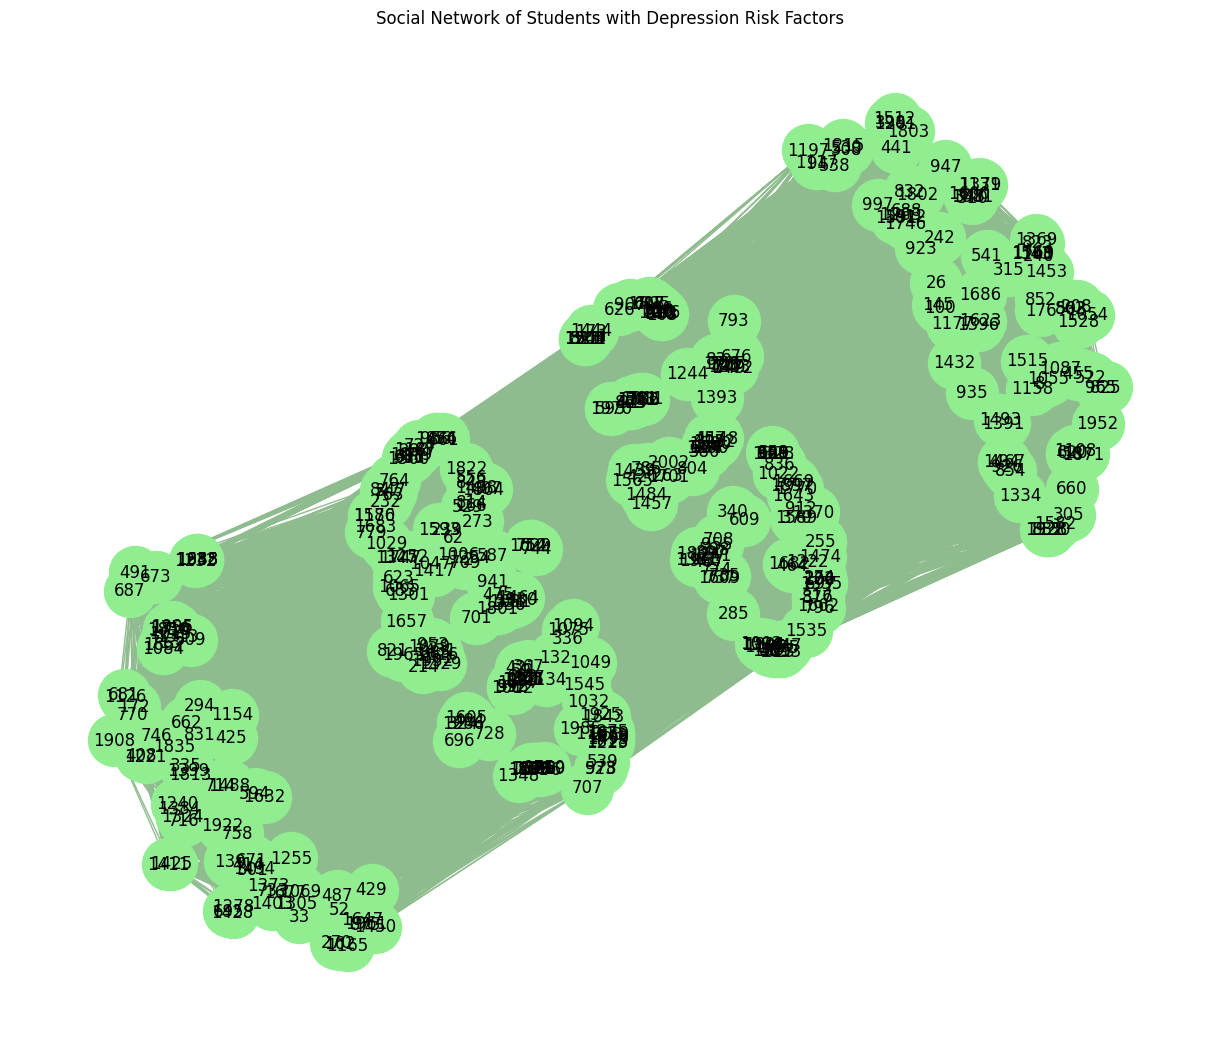

In [ ]:
G = nx.Graph()

for _, row in data.iterrows():
    G.add_node(row['id'], depression=row['Depression'], city=row['City'], family_history=row['Family History'])

for i, row1 in data.iterrows():
    for j, row2 in data.iterrows():
        if i != j:
            if row1['Family History'] == row2['Family History']:
                G.add_edge(row1['id'], row2['id'], relation='Family History')
            if row1['Have you ever had suicidal thoughts ?'] == 'Yes' and row2['Have you ever had suicidal thoughts ?'] == 'Yes':
                G.add_edge(row1['id'], row2['id'], relation='Suicidal Thoughts')

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)
nx.draw(G,pos, with_labels=True, node_size=1400, node_color='lightgreen',edge_color="darkseagreen")
plt.title("Social Network of Students with Depression Risk Factors")
plt.show()

Community Analysis


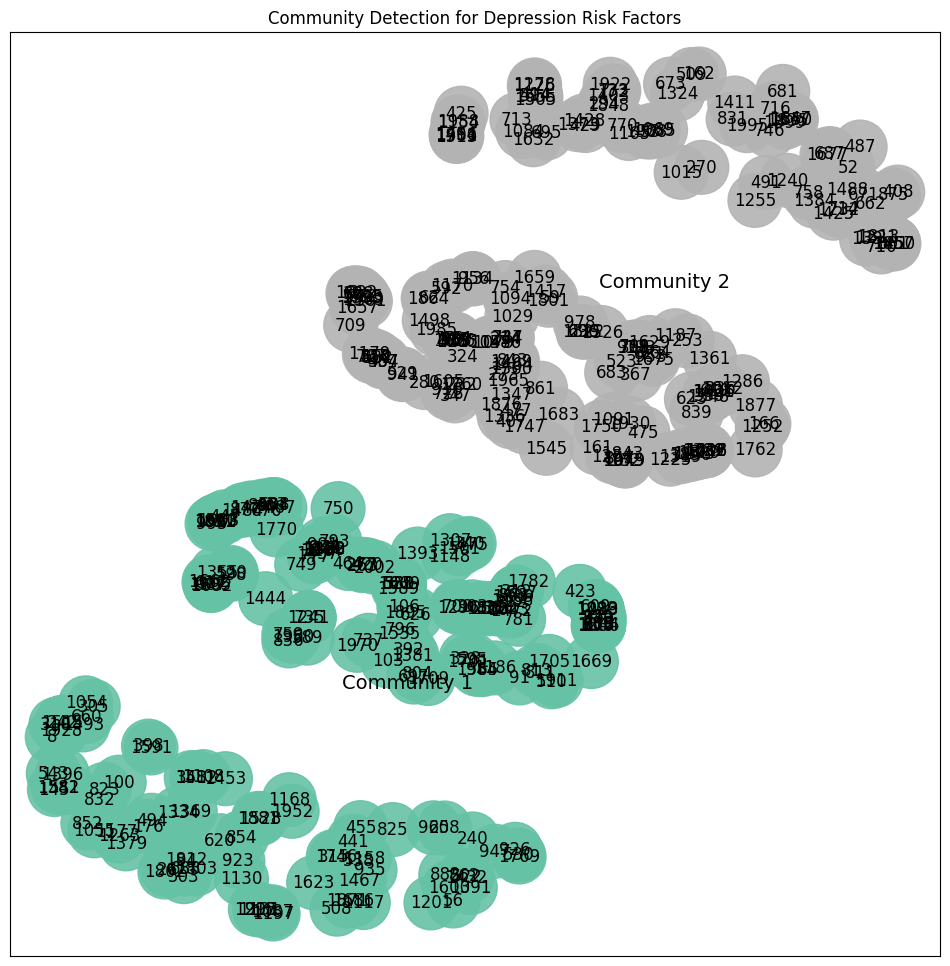

In [ ]:
communities = list(greedy_modularity_communities(G))

community_dict = {}
for i, community in enumerate(communities):
    for node in community:
        community_dict[node] = i


plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
colors = [community_dict[node] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=1500, cmap=plt.cm.Set2, node_color=colors, alpha=0.9)
nx.draw_networkx_labels(G, pos, font_size=12)

for i, community in enumerate(communities):
    x, y = zip(*[pos[node] for node in community])
    plt.text(sum(x)/len(x), sum(y)/len(y), f"Community {i+1}", fontsize=14, ha='left', color='black')

plt.title("Community Detection for Depression Risk Factors")
plt.show()


In [ ]:
density = nx.density(G)
diameter = nx.diameter(G) if nx.is_connected(G) else "Graph is not connected"
clustering_coefficient = nx.average_clustering(G)

print(f"Graph Density: {density}")
print(f"Graph Diameter: {diameter}")
print(f"Clustering Coefficient: {clustering_coefficient}")

Graph Density: 0.6897368421052632
Graph Diameter: 3
Clustering Coefficient: 0.887675191616851


Top influentials


In [ ]:
top_influential = sorted(degree.items(), key=lambda x: x[1], reverse=True)[:5]
for i, (node, centrality) in enumerate(top_influential, start=1):
    print(f"{i}.{node}: {centrality}")

1.Suicidal Thoughts: 1.0
2.Visakhapatnam: 0.03333333333333333
3.Bangalore: 0.03333333333333333
4.Srinagar: 0.03333333333333333
5.Varanasi: 0.03333333333333333


Correlation Matrix based on the data


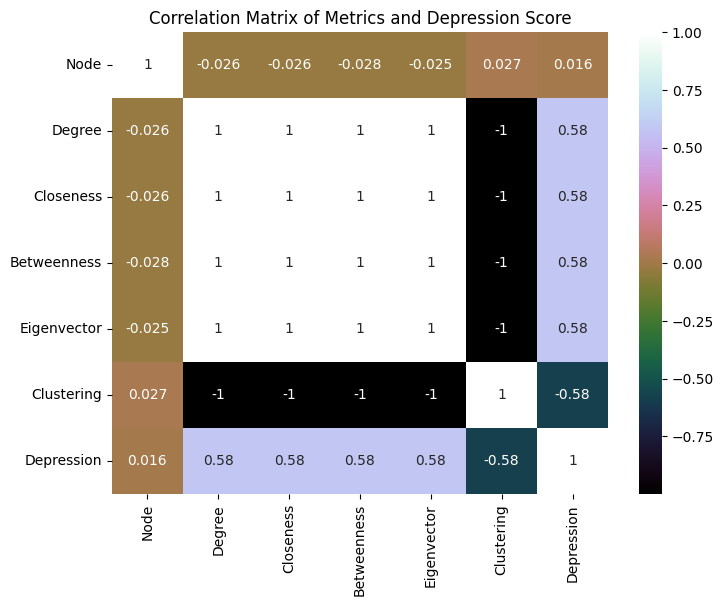

In [ ]:

node_metrics = pd.DataFrame({
    'Node': list(G.nodes()),
    'Degree': list(dict(nx.degree(G)).values()),
    'Closeness': list(nx.closeness_centrality(G).values()),
    'Betweenness': list(nx.betweenness_centrality(G).values()),
    'Eigenvector': list(nx.eigenvector_centrality(G).values()),
    'Clustering': list(nx.clustering(G).values()),
    'Depression': [G.nodes[node]['depression'] for node in G.nodes()]

})

# Correlation plot
plt.figure(figsize=(8, 6))
sns.heatmap(node_metrics.corr(), annot=True, cmap='cubehelix')
plt.title("Correlation Matrix of Metrics and Depression Score")
plt.show()

In [ ]:
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Ensure that all nodes in G are included in the embeddings
node_embeddings = pd.DataFrame(index=G.nodes(), columns=range(64))
for node in G.nodes():
    try:
        node_embeddings.loc[node] = model.wv[node]
    except KeyError:
         node_embeddings.loc[node] = np.zeros(64)

np.random.seed(42)
depression_scores = {node: np.random.uniform(1, 10) for node in G.nodes()}
node_embeddings['Academic Pressure'] = node_embeddings.index.map(depression_scores)

X = node_embeddings.iloc[:, :-1].values
y = node_embeddings['Academic Pressure'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


# Simulate intervention: Increase connectivity for isolated nodes
isolated_nodes = [node for node, degree in G.degree() if degree == 0]
for node in isolated_nodes:
    random_neighbor = np.random.choice(list(G.nodes()))
    G.add_edge(node, random_neighbor)

# Recompute Node2Vec embeddings after intervention
node2vec_after = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model_after = node2vec_after.fit(window=10, min_count=1, batch_words=4)

node_embeddings_after = pd.DataFrame(index=G.nodes(), columns=range(64))
for node in G.nodes():
    try:
        node_embeddings_after.loc[node] = model_after.wv[node]
    except KeyError:
        node_embeddings_after.loc[node] = np.zeros(64)

# Predict depression scores after intervention
X_after = node_embeddings_after.iloc[:, :].values
y_pred_after = model.predict(X_after)

print(f"Mean Squared Error: {mse:.2f}\n")

print(f"Predicted depression scores after intervention: \n{y_pred_after[:10]}")

Computing transition probabilities:   0%|          | 0/400 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/400 [00:00<?, ?it/s]

Mean Squared Error: 6.36

Predicted depression scores after intervention: 
[6.99683654 7.05268811 7.02297249 7.34563315 6.53450263 7.04597367
 6.82312383 6.23462354 6.65053994 6.66278637]


In [ ]:
community_dict = {}
for i, community in enumerate(communities):
    for node in community:
        community_dict[node] = i
        G.nodes[node]['community'] = i

city_community_dict = {}
for _, row in data.iterrows():
  city_community_dict[row['City']] = community_dict.get(row['id'])

node_to_city = {node: data.loc[data['id'] == node, 'City'].iloc[0] for node in G.nodes()}
centrality_df['Community'] = centrality_df['City'].map(city_community_dict)

high_risk_groups = centrality_df.groupby('Community').agg({
    'Degree Centrality': 'mean',
    'Betweenness Centrality': 'mean',
    'Closeness Centrality': 'mean',
    'Eigenvector Centrality': 'mean',
    'City': 'count'
}).rename(columns={'City': 'Community Size'}).sort_values(by='Community Size')
isolated_students = []
for node in G.nodes():
    student_data = data.loc[data['id'] == node]
    if not student_data.empty:
        age = student_data['Age'].iloc[0]
        if age <=18:
             isolated_students.append(node)
print("Isolated Students:", isolated_students)
print("High-Risk Groups:")
print(high_risk_groups)

print("\nActionable Recommendations:")
print("1. Provide targeted interventions for isolated students:", isolated_students)
print("2. Strengthen relationships in high-risk communities:",high_risk_groups[high_risk_groups['Community Size'] < 5])
print("3. Promote activities to enhance social engagement for sparse communities.")

Isolated Students: [173, 222, 232, 324, 421, 595, 668, 696, 713, 785, 897, 907, 1022, 1055, 1134, 1156, 1319, 1373, 1475, 1499, 1501, 1623, 1922, 1988]
High-Risk Groups:
           Degree Centrality  Betweenness Centrality  Closeness Centrality  \
Community                                                                    
0.0                 0.033333                     0.0              0.508475   
1.0                 0.033333                     0.0              0.508475   

           Eigenvector Centrality  Community Size  
Community                                          
0.0                        0.1291              10  
1.0                        0.1291              20  

Actionable Recommendations:
1. Provide targeted interventions for isolated students: [173, 222, 232, 324, 421, 595, 668, 696, 713, 785, 897, 907, 1022, 1055, 1134, 1156, 1319, 1373, 1475, 1499, 1501, 1623, 1922, 1988]
2. Strengthen relationships in high-risk communities: Empty DataFrame
Columns: [Degree Cen